# Process Extracted RI into Labels For Meshing.
Regularize Body Location and Pad The Space Accordingly

In [32]:
# Imports
import os
import numpy
import scipy as sp
import PIL as pl
from matplotlib import pyplot as plt

# I/O Allocation
Takes in extracted matrix.\
Output to Mesh Label

In [33]:
# Path Variables:
repo_path = "/Users/caozehuang/Documents/GitHub/Photon-Transport-Simulation/"     # Replace with repository path
export_address = "data/mesh_label/"
access_address = "data/extracted_ri/"         

# Helpers:
def output_address(subfolder="data/", repository=repo_path):
    out_path = f"{repository}{subfolder}"
    return out_path

def modified_output_address(file_name):
    name_part = file_name.split(".")[0]
    new_name = f"{name_part}_label.mat"         # Tag File Type
    return new_name

In [34]:
# Accessing the file:
file_name = "Test_extracted.mat"     # Replace with actual file name
access_path = f"{repo_path}{access_address}{file_name}"
print("Accessing: " + access_path)

# Open file:
print("Accessing")
content = sp.io.loadmat(access_path)
print(content.keys())

Accessing: /Users/caozehuang/Documents/GitHub/Photon-Transport-Simulation/data/extracted_ri/Test_extracted.mat
Accessing
dict_keys(['__header__', '__version__', '__globals__', 'masked_ri'])


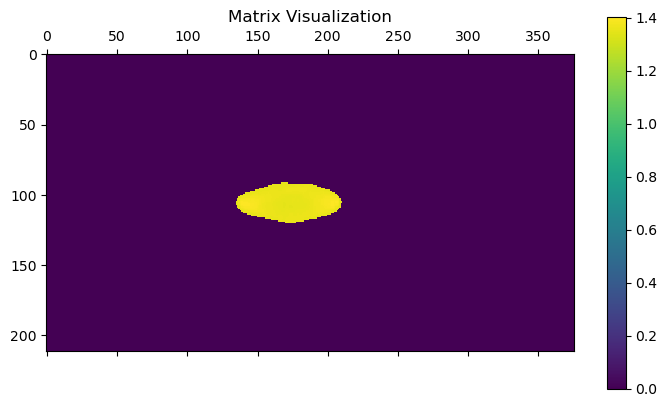

In [35]:
# Retrieve Matrix
extract = content['masked_ri']

# Verify
plt.matshow(extract) 
plt.colorbar() # Creates a colorbar for the plot
plt.title("Matrix Visualization")
plt.show() 

Enter image parameters:
- Pixel sizes
- Matrix dimension
- Unit

Here we can compute the size of each pixel.

In [42]:
# Parameters:
width = 35.7014
depth = 212
unit = 'um' # unit of measurement
pix_num = [376, 212] # of (x,y) in pixels
pix_size = [width/pix_num[0], depth/pix_num[1]]  # (x, y) size of one pixel in um

# Define the gel space:
cutoff = depth/2    # Default, can change w/ samples, measure your pixel line in fiji

# Check if all is good:
print("The image specifcations to deal with are: \n")
print(f"The length of the image is {width} {unit}, divided over {pix_num[0]} pixels. \n")
print(f"The depth of the image is {depth} {unit}, divided over {pix_num[1]} pixels. \n")
print(f"The pixel diemnsions are {pix_size[0]} {unit} wide, {pix_size[0]} {unit} tall. \n")
print("If this is off, gotta recheck lmao.")

The image specifcations to deal with are: 

The length of the image is 35.7014 um, divided over 376 pixels. 

The depth of the image is 212 um, divided over 212 pixels. 

The pixel diemnsions are 0.09495053191489361 um wide, 0.09495053191489361 um tall. 

If this is off, gotta recheck lmao.


# Regularizing Geometry
Maybe needed, later issue.

In [ ]:
# Centering the Body
# Helper
def top_bottom(arr):


    return 0

def side_align(arr):

    return 0

# Call Helper


# Cell's Ellipical Sizes

In [43]:
# Normalize spacing


# Padding

In [44]:
# Padding RIs
air = 1.3
gel = 1.34

# Helper
def pad(arr, air, gel, cutoff, depth):

    # Above cutoff
    rows_air = arr[:cutoff, :]
    rows_air[rows_air == 0] = air
    arr[:cutoff, :] = rows_air

    # Below cutoff
    rows_gel = arr[cutoff:depth, :]
    rows_gel[rows_gel == 0] = gel
    arr[cutoff:depth, :] = rows_gel

    return arr

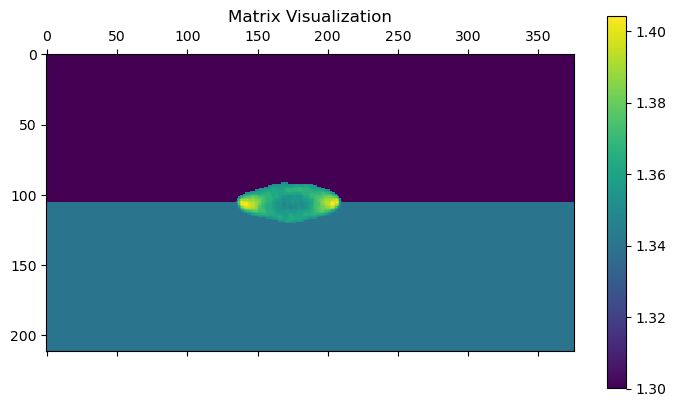

In [45]:
out_label = pad(extract, air, gel, int(cutoff), depth)

# Verify
plt.matshow(extract) 
plt.colorbar() # Creates a colorbar for the plot
plt.title("Matrix Visualization")
plt.show() 

# Saving output file.

In [46]:
# Save the extracted geometry as a .mat file:
# Export address and name:
output_path = output_address(export_address, repo_path)
output_name = modified_output_address(file_name=file_name)

# Save
try:
    sp.io.savemat(f"{output_path}{output_name}", {"masked_ri": out_label})
    print(f"Extracted RI matrix saved successfully at {output_path}{output_name}!")
except Exception as e:
    print(f"Error saving extracted RI matrix: {e}")
    raise


Extracted RI matrix saved successfully at /Users/caozehuang/Documents/GitHub/Photon-Transport-Simulation/data/mesh_label/Test_extracted_label.mat!
